In [1]:
%load_ext watermark
import pandas as pd
import numpy as np
import datetime as dt
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import json

def apply_land_use(x, amap):
    try:
        val = amap.loc[x, "scaled"]
    except:
        val = 0
    return val

# this defines the css rules for the note-book table displays
header_row = {'selector': 'th:nth-child(1)', 'props': f'background-color: #FFF; text-align:right'}
even_rows = {"selector": 'tr:nth-child(even)', 'props': f'background-color: rgba(139, 69, 19, 0.08);'}
odd_rows = {'selector': 'tr:nth-child(odd)', 'props': 'background: #FFF;'}
table_font = {'selector': 'tr', 'props': 'font-size: 10px;'}
table_data = {'selector': 'td', 'props': 'padding: 6px;'}
table_caption = {'selector': 'caption', 'props': 'font-size: 14px; font-style: italic; caption-side: bottom; text-align: left; margin-top: 10px'}
table_css_styles = [even_rows, odd_rows, table_font, header_row, table_caption]


table_large_data = {'selector': 'tr', 'props': 'font-size: 14px;'}
table_large_font = [even_rows, odd_rows, table_large_data, header_row, table_caption]

canton = "Valais"
cantons_avoisinante = "Vaud, Genève"

# lakes
lt_data = pd.read_csv("resources/end_pipe/survey_work_data.csv")
lt_data["date"] = pd.to_datetime(lt_data["date"], format="%Y-%m-%d")
leman_valais = lt_data[lt_data.canton == canton].copy()

# land use
land_use = pd.read_csv("resources/end_pipe/land_use_work_data.csv")
lu_map = land_use[land_use.use == "Siedl"][["slug", "scaled"]].set_index("slug")

# rivers
rt_data = pd.read_csv("resources/end_pipe/rivers_work_data.csv", low_memory=False)
rt_data["date"] = pd.to_datetime(rt_data["date"], format="%Y-%m-%d")

# sentiers_pedestres
sp_d = pd.read_csv("resources/end_pipe/work_data_alpes.csv")
sp_d["date"] = pd.to_datetime(sp_d["date"], format="%Y-%m-%d")

all_data = pd.concat([rt_data, sp_d, lt_data])

In [2]:
lake_and_river_values = (all_data.Project == "training")&(all_data.canton == canton)
mountain_values = (all_data.zone == "montagne")&(all_data.canton == canton)
valais_all =  pd.concat([all_data[lake_and_river_values], all_data[mountain_values]])

not_valais = all_data[all_data.canton != canton].copy()
not_valais = not_valais[not_valais["date"] <= "2021-10-31"].copy()
# not_valais["date"] = pd.to_datetime(not_valais["date"])
operations={
    "loc_date":"nunique", 
    "city":"nunique", 
    "quantity":"sum",
    "location":"nunique"
}
summary_data = valais_all.groupby(["zone"]).agg(operations)

summary_data = summary_data.astype("int")

# Rapport Cantonal: Valais

## Historique

Le Valais dispose d'une côte réduite au lac Léman. C'est pourquoi, par rapport aux autres cantons riverains du lac, il y a relativement peu d'échantillons. Le premier échantillon valaisan a été prélevé à Saint-Gingolph en 2016. La masse d'échantillons décrivant les conditions valaisannes a été collectée dans le cadre du recensement fédéral des déchets sauvages. Cette publication présente les résultats pour le lac ([Le Léman](https://hammerdirt-analyst.github.io/IQAASL-End-0f-Sampling-2021/lac-leman.html)) et le Rhône ([Rhône](https://hammerdirt-analyst.github.io/IQAASL-End-0f-Sampling-2021/rhone_sa.html#)). Les résultats des Alpes ont été considérés séparément ([Alpen und der Jura](https://hammerdirt-analyst.github.io/IQAASL-End-0f-Sampling-2021/alpes_valaisannes.html)).

Nous considérons ici les résultats comme des zones d'intérêt pour les acteurs du canton. Nous définissons donc trois zones qui représentent les différentes régions où des données ont été collectées dans le canton.

* lac
* montagne
* rivière

### Résumé des échantillons novembre 2015 à novembre 2021

Au total, 24 échantillons ont été prélevés en Valais. Cela représente 15'287 objets collectés sur 4'152 m².

In [3]:
caption_english = "Sampling history Valais: The number of samples and the magnitude of the effort by context. Note: hours is the amount of time counting and collecting."

caption_french = "Historique des échantillonnages Valais : Le nombre d'échantillons et l'ampleur de l'effort par contexte. Remarque : les heures correspondent au temps passé à compter et à collecter."

In [4]:
dims = pd.read_csv("resources/end_pipe/work_dimensions.csv")

display_names_fr = {
    'loc_date': 'échantillons',
     'city': 'municipalités',
     'quantity': 'quantité',
     'location': 'site',
     'length': 'mètres',
     'area': 'm²',
     'hours': 'heures',
     'count': 'echantillons',
     'mean': 'moyenne',
     'std': 'écart-type',
     'doy': 'jdl',
     'Project': 'Projet',
     'water_name': "zone d'interêt",
     'river_bassin': 'bassin versant',
     'material': 'matériel',
     'parent_code': 'code de base',
     'groupname': 'groupe',
     'slug': 'site',
     'hex minus': 'terre sèche',
     'use': 'utilisation',
     'scaled': 'normalisée',
     'binned': 'rang',
     'q_weight': '% de total',
     's_weight': '% des échantillons',
     'time': 'minutes',
     'material':'matériel',
     'fail_rate': "taux d'échec",
     'object': 'objet'
 
                    
}

land_use_names_fr = {
    "See":"lac",
    "Wald":"forêt",
    "Siedl":"bâtiments",
    "dist": "distance à la rivière",
    "undefined":"non définie",
    "Obstanlage":"vergers",
    "Reben":"vignobles",
    "recreation":"récréation",
    "Strasse":"rues",
    "Stadtzentr":"centre ville",
    "Sumpf": "marécages",
    "Fels": "falaise",
    "Stausee":"réservoir",
    "Geroel":"rochers",
    "infrastructure":"infrastructure",
}

material_names_fr = {
    "Chemicals": "Produit chimiques",
    "Cloth": "Textiles",
    "Glass": "Verre",
    "Metal": "Métal",
    "Paper":"Papier",
    "Plastic": "Plastique",
    "Rubber": "Caoutchouc",
    "Unidentified": "Non définie",
    "Wood": "Bois"
}

land_use_of_interest = [
    'Siedl', 
    'Wald',
    'Stadtzentr',
    'Reben', 
    'Obstanlage',
    'undefined',
    'infrastructure',
    'recreation',
    'Strasse'
]

d_lac = dims[dims.location.isin(valais_all[valais_all.zone == "lac"].location.unique())].copy()
d_lac["zone"] = "lac"
d_riv = dims[dims.location.isin(valais_all[valais_all.zone == "rivière"].location.unique())].copy()
d_riv["zone"] = "rivière"
d_mon = dims[dims.location.isin(valais_all[valais_all.zone == "montagne"].location.unique())].copy()
d_mon["zone"] = "montagne"
dimensional_summary = pd.concat([d_lac, d_riv, d_mon])

d_sum = dimensional_summary.groupby("zone").agg({"area":"sum", "length":"sum", "time":"sum"})
summary_by_zone = pd.concat([summary_data, d_sum], axis=1, ignore_index=False)
summary_by_zone["hours"] = (summary_by_zone["time"]/60).round(2)
summary_by_zone.drop("time", inplace=True, axis=1)
summary_by_zone.loc["total", : ] = summary_by_zone.sum()
summary_by_zone.index.name = None
summary_by_zone.rename(columns=display_names_fr, inplace=True)
summary_by_zone = summary_by_zone.astype("int")
summary_by_zone.style.set_table_styles(table_large_font).format('{:,}' ).set_caption(caption_french)

,échantillons,municipalités,quantité,site,m²,mètres,heures
lac,13,1,"8,907",1,"1,835",402,49
montagne,7,7,"1,337",7,"1,837",436,24
rivière,4,4,72,4,480,181,5
total,24,12,"10,316",12,"4,152","1,019",79


### Communes et zones d'intérêt

In [5]:

cities_in_canton = ', '.join(valais_all.city.unique())

munix = f'__Municipalités:__ {cities_in_canton}'
md(munix)

__Municipalités:__ Riddes, Sion, Leuk, Salgesch, Saint-Gingolph, Val-de-Charmey, Crans-Montana, Val-d'Illiez, Troistorrents, Nendaz, Val de Bagnes

In [6]:
lakes = ', '.join(valais_all[valais_all.zone == 'lac'].water_name_slug.unique())
lakex = f'__Lacs:__ {lakes}'
md(lakex)

__Lacs:__ lac-leman

In [7]:
rivers = ', '.join(valais_all[valais_all.zone == 'rivière'].water_name_slug.unique())
riverx = f'__Rivières:__ {rivers}'
md(riverx)

__Rivières:__ rhone

### Utilisation des sols

L'utilisation du sol des sites étudiés en Valais par rapport à l'utilisation du sol d'autres cantons sur le lac. 

Chaque lieu d'inventaire est géolocalisé au centre d'un hexagone de 3 000 mètres. L'ampleur des attributs de l'occupation et de l'utilisation des sols à l'intérieur de cet hexagone est calculée. Cette procédure peut améliorer le choix des lieux d'échantillonnage. Les résultats ont déjà été utilisés pour identifier les caractéristiques d'un lieu d'inventaire qui peuvent conduire à l'accumulation de certains déchets.

In [8]:
valais_locs = valais_all.location.unique()
region_locs = all_data[all_data.canton.isin(["Vaud", "Genève"])].location.unique()



l_used = land_use[land_use.use.isin(land_use_of_interest)]

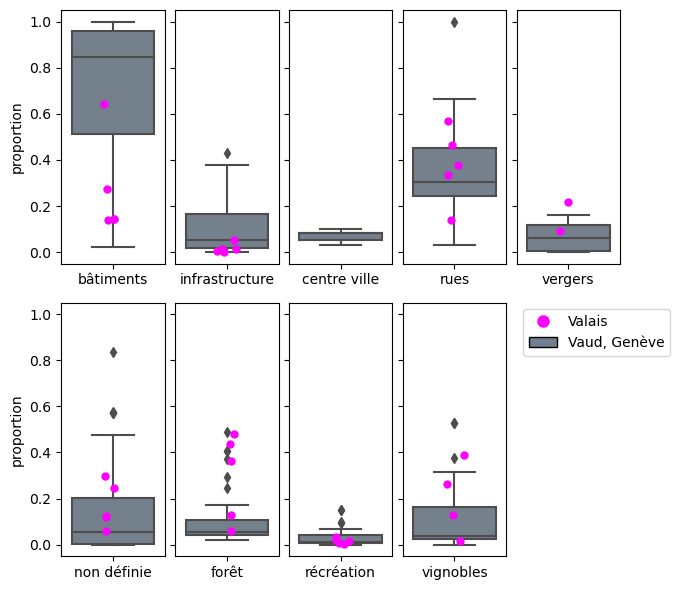

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(7,6), sharey=True)

v_land_use = land_use[land_use.slug.isin(valais_locs)].copy()
r_land_use = land_use[land_use.slug.isin(region_locs)].copy()

for i, name in enumerate(land_use_of_interest):
    row = i%2
    column = i%5
    ax = axs[row, column]
    sns.stripplot(data = v_land_use[v_land_use.use == name], y = "scaled", color="magenta", zorder=20, size=6, ax=ax)
    sns.boxplot(data= r_land_use[r_land_use.use == name], y="scaled",  ax=ax, color='slategray')
    ax.set_xticks([0], [land_use_names_fr[name]])
    ax.set_ylabel("proportion")

a_space = axs[1, 4]
a_space.axis('off')
h = [ Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor='magenta', markersize=10), Patch(facecolor='slategray', edgecolor='black', label='Color Patch')]
l = [canton, cantons_avoisinante ]
a_space.legend(h,l, bbox_to_anchor=(0,1), loc="upper left")

plt.tight_layout()
plt.subplots_adjust(wspace=.1)
plt.show()

## Résultats des inventaires

La densité est calculée en additionnant tous les objets trouvés pour chaque jour et lieu d'échantillonnage. La somme pour chaque échantillon est ensuite divisée par la longueur du rivage, de la rive ou du tronçon de sentier. Pour un exemple, voir le rapport fédéral sur le calcul des lignes de base. [Baselines](https://hammerdirt-analyst.github.io/IQAASL-End-0f-Sampling-2021/baselines.html).

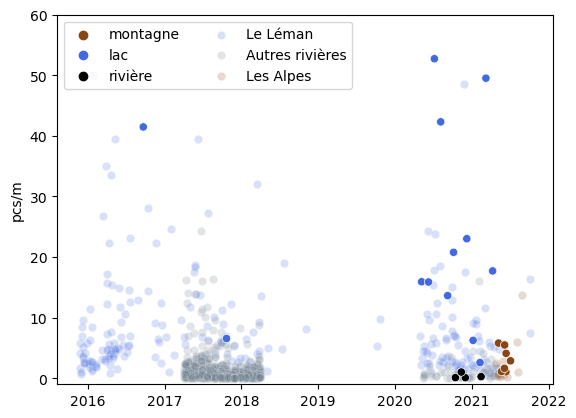

In [10]:
# # make the survey total from the list of available codes
# # survey_totals from valais
vs_jt = valais_all.groupby(["loc_date", "date", "zone"], as_index=False)["pcs/m"].sum()

# all other locations
# lake
lake_jt=not_valais[not_valais.zone == "lac"].groupby(["loc_date", "date"], as_index=False)["pcs/m"].sum()

# rivers
rhn_jt = not_valais[not_valais.zone == "rivière"].groupby(["loc_date", "date"], as_index=False)["pcs/m"].sum()

#alpes
alp_jt = not_valais[not_valais.zone == "montagne"].groupby(["loc_date", "date"], as_index=False)["pcs/m"].sum()

french_caption = "La densité totale par échantillon pour les 74 objets d'intérêt. \
Le premier prélèvement en Valais date de 2016. Les prélèvements en rivière \
et en montagne ont été réalisés lors du rapport fédéral."

fig, ax = plt.subplots()
sns.scatterplot(data=vs_jt, x="date", y="pcs/m", hue="zone", zorder=20, palette={'lac':'royalblue', 'montagne':'saddlebrown', 'rivière': 'black'}, ax=ax)
sns.scatterplot(data=lake_jt,  x="date", y="pcs/m", zorder=0, color='royalblue', alpha=0.2, ax=ax, label='Le Léman')
sns.scatterplot(data=rhn_jt, x="date", y="pcs/m", zorder=1, color='slategray', alpha=0.2, ax=ax, label='Autres rivières')
sns.scatterplot(data=alp_jt, x="date", y="pcs/m", zorder=1, color='saddlebrown', alpha=0.2, ax=ax, label='Les Alpes')
ax.set_ylim(-1, 60)
ax.legend(bbox_to_anchor=(0, 1), loc="upper left", ncol=2)
ax.set_xlabel("")
plt.show()

### Répartition de la densité des déchets

__Répartition de la densité des déchets à l'intérieur du canton.__

In [11]:
summaries = {
    canton:vs_jt["pcs/m"].describe(),
    "Le Léman": lake_jt["pcs/m"].describe(),
    "Autres Rivières":rhn_jt["pcs/m"].describe(),
    "Alpes": alp_jt["pcs/m"].describe()
    
}

zone_summaries = {
    "Lac":vs_jt[vs_jt.zone == "lac"]["pcs/m"].describe(),
    "Montagne":vs_jt[vs_jt.zone == "montagne"]["pcs/m"].describe(),
    "Rhône":vs_jt[vs_jt.zone == "rivière"]["pcs/m"].describe(),
    canton:vs_jt["pcs/m"].describe(),
}

valais_pcsm_total = pd.DataFrame(zone_summaries)
valais_pcsm_total = valais_pcsm_total.T
valais_pcsm_total["count"] = valais_pcsm_total["count"].astype("int")
valais_pcsm_total.rename(columns=display_names_fr, inplace=True)
valais_pcsm_total.drop("echantillons", inplace=True, axis=1)
valais_pcsm_total = valais_pcsm_total.T

english_caption_2 = "La répartition de la densité de déchets en Valais selon le domaine d'étude."



dis_total = valais_pcsm_total.style.set_table_styles(table_large_font).format(precision=2).set_caption(english_caption_2)
dis_total.background_gradient(axis=None, vmin=valais_pcsm_total.min().min(), vmax=valais_pcsm_total.max().max(), cmap="YlOrBr")

,Lac,Montagne,Rhône,Valais
moyenne,23.72,3.15,0.37,13.83
écart-type,17.04,2.01,0.44,16.56
min,2.58,1.06,0.09,0.09
25%,13.63,1.36,0.10,1.50
50%,17.71,2.87,0.18,6.03
75%,41.47,4.79,0.45,18.48
max,52.73,5.80,1.02,52.73


__Répartition de la densité des déchets à l'extérieur du canton.__

In [12]:
valais_compare = pd.DataFrame(summaries)
valais_compare = valais_compare.T
valais_compare["count"] = valais_compare["count"].astype("int")
valais_compare.rename(columns=display_names_fr, inplace=True)
valais_compare.drop("echantillons", inplace=True, axis=1)
valais_compare = valais_compare.T

english_caption_3 = "La répartition de la densité de déchets en Valais comparé à d'autres localités ayant des domaines d'études similaires"
valais_compare.style.set_table_styles(table_large_font).format(precision=2).set_caption(english_caption_3)
dis_total = valais_compare.style.set_table_styles(table_large_font).format(precision=2).set_caption(english_caption_2)
dis_total.background_gradient(axis=None, vmin=valais_compare.min().min(), vmax=valais_compare.max().max(), cmap="YlOrBr")

,Valais,Le Léman,Autres Rivières,Alpes
moyenne,13.83,8.09,1.32,9.60
écart-type,16.56,9.99,2.32,24.43
min,0.09,0.10,0.00,0.24
25%,1.50,2.67,0.23,0.54
50%,6.03,5.01,0.62,0.98
75%,18.48,9.35,1.42,3.60
max,52.73,77.10,24.29,86.20


__Répartition des objets selon matériel.__

In [13]:
dfCodes = pd.read_csv("resources/codes.csv")
dfCodes.set_index("code", drop=True, inplace=True)
dfCodes.loc["Gcaps", ["material", "description", "parent_code", "groupname"]] = "Plastic", "Plastic bottle tops", "Parent code", 'food and drink'

code_d = dfCodes["description"]
code_m = dfCodes["material"]
code_g = dfCodes["groupname"]

caption_material_fr = "Total des objets par type de matériau. Tous les échantillons."

valais_all["material"] = valais_all.code.apply(lambda x: code_m.loc[x])
material_totals = valais_all.groupby("material", as_index=False).quantity.sum()
material_totals["quantity"] = material_totals.quantity.astype(int)
material_totals["material"] = material_totals.material.apply(lambda x: material_names_fr[x])
material_totals["q_weight"] = (material_totals.quantity/material_totals.quantity.sum()).round(3)
material_totals = material_totals.set_index("material", drop=True)
material_totals.sort_values(by="quantity", ascending=False, inplace=True)
material_totals.index.name = None
material_totals.rename(columns=display_names_fr).style.set_table_styles(table_large_font).format('{:,}').set_caption(caption_material_fr)

,quantité,% de total
Plastique,"9,789",0.949
Métal,201,0.019
Verre,127,0.012
Papier,67,0.006
Caoutchouc,49,0.005
Bois,42,0.004
Textiles,30,0.003
Produit chimiques,11,0.001
Non définie,0,0.0


### Objets d'intérêt

Les objets d'intérêt sont ceux qui ont été trouvés dans au moins 50 % des enquêtes ou qui figurent parmi les dix objets les plus abondants en termes de quantité.

```{note}
Le choix du mode de regroupement des différents objets doit doivent être représentatifs des groupes cibles ou des domaines de préoccupation. Il peut y avoir de nombreux groupes différents qui sont corrects, cela dépend du cas d'utilisation. Dans le cas présent, nous nous intéressons aux objets qui ont été trouvés souvent et en grande quantité.
```

In [14]:
valais_all["fail"] = valais_all['pcs/m'] > 0
fail_rates = valais_all.groupby("code", as_index=False).fail.sum()
n_samps = valais_all.loc_date.nunique()
fail_rates["rate"]= fail_rates.fail/n_samps
fail_rates = fail_rates.sort_values(by="rate", ascending=False)
failed = fail_rates[fail_rates.rate >= .5].code.unique()

abundant = valais_all.groupby("code", as_index=False).quantity.sum()
abundant_c = abundant.sort_values(by="quantity", ascending=False)[:10].code.unique()

most_common_codes = list(set([*abundant, *failed]))

with open('resources/french_code_translations.json') as json_file:
    french_names = json.load(json_file)

french_names.update({
    "Gcaps":"Couvercles de bouteilles en plastique",
    "Gfoam": "Polystyrène expansé fragmenté",
    "Gfrags": "Plastiques fragmentés"
})

mc_data = valais_all[valais_all.code.isin(most_common_codes)].groupby("code", as_index=False).agg({"quantity":"sum", "pcs/m":"median", "fail":"sum"})
mc_data["fail_rate"] = (mc_data.fail/n_samps).round(2)
mc_data["q_weight"] = (mc_data.quantity/abundant.quantity.sum()).round(2)
mc_data["object"] = mc_data.code.apply(lambda x: french_names[x])
mc_data = mc_data[["object", "quantity", "pcs/m", "q_weight", "fail_rate"]]

mc_data = mc_data.sort_values(by="quantity", ascending=False)
mc_data["quantity"] = mc_data.quantity.astype("int")
mc_data["pcs/m"] = mc_data["pcs/m"].round(2)
mc_data.set_index("object", drop=True, inplace=True)
mc_data.index.name = None
mc_data.rename(columns=display_names_fr).style.set_table_styles(table_large_font).format('{:,}')

,quantité,pcs/m,% de total,taux d'échec
Polystyrène expansé fragmenté,"1,853",0.86,0.18,0.54
Plastiques fragmentés,"1,519",1.38,0.15,0.79
"Emballages de bonbons, de snacks",637,0.36,0.06,0.83
"Bâche, feuille plastique industrielle",600,0.21,0.06,0.62
Couvercles de bouteilles en plastique,570,0.28,0.06,0.67
Coton-tige,547,0.31,0.05,0.54
Mousse de plastique pour l'isolation thermique ou ...,458,0.01,0.04,0.5
Déchets de construction en plastique,360,0.17,0.03,0.67
Autres produits en plastique ou en mousse,280,0.05,0.03,0.62
Cartouches de fusil de chasse,269,0.11,0.03,0.58


### Objets d'intérêt résultats municipaux

In [15]:
def rotateText(x):
    return 'writing-mode: vertical-lr; transform: rotate(-180deg);  padding:10px; margins:0; vertical-align: baseline;'

objects_city = valais_all[valais_all.code.isin(most_common_codes)].groupby(["city","code"], as_index=False)["pcs/m"].mean()
objects_city["object"] = objects_city.code.apply(lambda x: french_names[x])
municipal_results = objects_city.pivot(columns="city", index="object", values="pcs/m").fillna(0)
municipal_results = municipal_results.round(2)
municipal_results.index.name = None
municipal_results.columns.name = None
dist = municipal_results.style.set_table_styles(table_large_font).format('{:,}').applymap_index(rotateText, axis=1)
dist.background_gradient(axis=None, vmin= municipal_results.min().min(), vmax= municipal_results.max().max(), cmap="YlOrBr")

,Crans-Montana,Leuk,Nendaz,Riddes,Saint-Gingolph,Salgesch,Sion,Troistorrents,Val de Bagnes,Val-d'Illiez,Val-de-Charmey
Autres produits en plastique ou en mousse,0.0,0.02,0.94,0.02,0.55,0.06,0.0,0.0,0.0,0.0,0.0
"Bouchons de bouteilles en métal, couvercles et tirettes",0.02,0.0,0.02,0.02,0.07,0.0,0.0,0.04,0.14,0.0,0.0
"Bouteilles à boisson < = 0,5L",0.05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.02,0.0
"Bâche, feuille plastique industrielle",0.0,0.06,0.0,0.0,1.75,0.38,0.0,0.0,0.0,0.0,0.0
Bâtonnets de sucette,0.0,0.0,0.0,0.0,0.28,0.0,0.0,0.0,0.0,0.0,0.0
Cartouches de fusil de chasse,0.0,0.0,0.0,0.0,0.68,0.0,0.02,0.0,0.0,0.0,0.0
Coton-tige,0.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0
Couvercles de bouteilles en plastique,0.0,0.0,0.05,0.0,1.49,0.0,0.0,0.0,0.14,0.0,0.1
Déchets de construction en plastique,0.0,0.08,0.0,0.08,0.83,0.0,0.0,0.0,0.0,0.0,0.63
Emballage fast food,0.0,0.0,0.0,0.0,0.46,0.0,0.0,0.0,0.0,0.0,0.0


### Résultats par utilités des objets

L'utilité d'un objet est basée sur l'utilisation de l'objet avant qu'il ne soit jeté ou sur la description de l'objet si l'utilisation d'origine n'est pas déterminée. 

* eaux usées : objets rejetés par les stations d'épuration des eaux, y compris les objets susceptibles d'être jetés dans les toilettes
* microplastiques (< 5 mm) : plastiques fragmentés et résines plastiques de préproduction
* infrastructures : éléments liés à la construction et à l'entretien des bâtiments, des routes et de l'approvisionnement en eau et en électricité
* alimentation et boissons : tous les matériaux liés à la consommation d'aliments et de boissons
* agriculture : principalement les feuilles industrielles, c'est-à-dire le paillage et les couvertures de rangs, les serres, la fumigation des sols, l'enrubannage des balles. Comprend les plastiques durs pour les clôtures agricoles, les pots de fleurs, etc.
* tabac : principalement les filtres de cigarettes, y compris tout le matériel lié au tabagisme
* Loisirs : objets liés aux sports et aux loisirs, tels que la pêche, la chasse, la randonnée, etc.
* Emballages non alimentaires et boissons : matériaux d'emballage non identifiés comme étant liés à l'alimentation, aux boissons ou au tabac.
* fragments de plastique : morceaux de plastique d'origine ou d'utilisation indéterminée
* articles personnels : accessoires, hygiène et vêtements

In [16]:
valais_all["groupname"] = valais_all.code.apply(lambda x: code_g.loc[x])

cg_agg = valais_all.groupby(["loc_date", "city", "groupname"], as_index=False)["pcs/m"].sum()
cg_agg_group = cg_agg.groupby(["city","groupname"], as_index=False)["pcs/m"].median()
cg_display = cg_agg_group.pivot(columns="city", index="groupname", values=["pcs/m"])
cg_display=cg_display.round(2)
cg_display.index.name = None
cg_display.columns = cg_display.columns.droplevel()
cg_display.fillna(0, inplace=True)
cg_display.columns.name = None

dist = cg_display.style.set_table_styles(table_large_font).format('{:,}').applymap_index(rotateText, axis=1)
dist.background_gradient(axis=None, vmin=cg_display.min().min(), vmax= cg_display.max().max(), cmap="YlOrBr")

,Crans-Montana,Leuk,Nendaz,Riddes,Saint-Gingolph,Salgesch,Sion,Troistorrents,Val de Bagnes,Val-d'Illiez,Val-de-Charmey
agriculture,0.02,0.06,0.0,0.02,0.92,0.38,0.0,0.01,0.0,0.02,0.03
food and drink,0.25,0.0,0.39,0.14,3.56,0.0,0.02,0.26,0.66,0.17,1.03
infrastructure,0.23,0.1,0.93,0.18,5.64,0.02,0.0,0.27,0.58,5.03,1.37
micro plastics (< 5mm),0.09,0.0,0.03,0.0,0.53,0.0,0.0,0.0,0.14,0.0,0.0
packaging non food,0.02,0.0,0.17,0.01,0.04,0.18,0.02,0.12,0.64,0.05,0.3
personal items,0.07,0.0,0.08,0.03,0.29,0.04,0.0,0.07,0.0,0.17,0.47
plastic pieces,0.07,0.0,0.23,0.22,2.56,0.0,0.0,0.49,0.28,0.01,1.47
recreation,0.11,0.04,0.03,0.04,0.87,0.04,0.02,0.14,0.14,0.03,0.2
tobacco,0.18,0.0,0.05,0.05,0.28,0.0,0.04,0.24,1.52,0.01,0.63
unclassified,0.02,0.04,0.96,0.02,0.53,0.06,0.0,0.0,0.14,0.0,0.27


## Lieux d'enquêtes

In [17]:
survey_locations = valais_all[["location", "city", "zone"]].drop_duplicates()
survey_locations.set_index("location", inplace=True)
survey_locations.index.name = None
survey_locations.style.set_table_styles(table_large_font)

,city,zone
les-glariers,Riddes,rivière
les-vieux-ronquoz,Sion,rivière
leuk-mattenstrasse,Leuk,rivière
tschilljus,Salgesch,rivière
grand-clos,Saint-Gingolph,lac
charmey,Val-de-Charmey,montagne
crans-montana,Crans-Montana,montagne
la-tzoumaz,Riddes,montagne
les-crosets,Val-d'Illiez,montagne
morgins,Troistorrents,montagne


## Inventaire complet

In [18]:
operators = {
    "quantity":"sum",
    "pcs/m": "median",
}

valais_all["fail"] = valais_all["quantity"] > 0
code_fails = valais_all.groupby("code", as_index=False).fail.sum()
code_fails["rate"] = code_fails.fail/valais_all.loc_date.nunique()
cf_map = code_fails[["code", "rate"]].set_index("code")

already_french = ['G705', 'G707', 'G706', 'G709', 'G710','G704', 'G712', 'G702', 'G943', 'G703']
labels = dfCodes.loc[already_french]
labs = labels[["description"]].to_dict()
french_names.update(labs["description"])

inventory = valais_all.groupby("code", as_index=False).agg(operators)
inventory["fail_rate"] = inventory.code.apply(lambda x: cf_map.loc[x, "rate"])
inventory = inventory[inventory.quantity > 0]
inventory["object"] =inventory.code.apply(lambda x: french_names[x])
inventory = inventory[["code", "object", "quantity", "pcs/m", "fail_rate"]]
inventory.set_index("code", inplace=True)
inventory["quantity"] = inventory.quantity.astype("int")
inventory["fail_rate"] = inventory.fail_rate.round(3)
inventory.sort_values(by="quantity", inplace=True, ascending=False)
inventory.rename(columns=display_names_fr, inplace=True)
inventory.index.name = None

In [19]:
inventory.style.set_table_styles(table_large_font)

,objet,quantité,pcs/m,taux d'échec
Gfoam,Polystyrène expansé fragmenté,1853,0.865000,0.542000
Gfrags,Plastiques fragmentés,1519,1.375000,0.792000
G30,"Emballages de bonbons, de snacks",637,0.355000,0.833000
G67,"Bâche, feuille plastique industrielle",600,0.210000,0.625000
Gcaps,Couvercles de bouteilles en plastique,570,0.275000,0.667000
G95,Coton-tige,547,0.310000,0.542000
G704,Brosse de télésiège,461,0.000000,0.042000
G74,Mousse de plastique pour l'isolation thermique ou ...,458,0.010000,0.500000
G89,Déchets de construction en plastique,360,0.170000,0.667000
G124,Autres produits en plastique ou en mousse,280,0.050000,0.625000


In [20]:

today = dt.datetime.now().date().strftime("%d/%m/%Y")
where = "Biel, CH"

my_block = f"""
<br />
<br />
This script updated {today} in {where}

\u2764\ufe0f what you do - faites ce que vous \u2764\ufe0f
"""

md(my_block)


<br />
<br />
This script updated 04/09/2023 in Biel, CH

❤️ what you do - faites ce que vous ❤️


In [21]:
%watermark --iversions -b -r

Git repo: https://github.com/hammerdirt-analyst/cantonal_reports.git

Git branch: main

seaborn   : 0.12.2
pandas    : 2.0.3
json      : 2.0.9
matplotlib: 3.7.1
numpy     : 1.25.2

